# Different configurations using homeostasis with Kmeans

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
from ToolsMonitor import GenerateActivationMap, DisplayActivationMap
from Event import Event, SimpleAlphabet
from STS import STS
from Layer import ClusteringLayer
from ToolsMonitor import (
    DisplayImage,
    DisplaySurface3D,
    DisplaySurface2D,
    DisplayConvergence,
)
from Tools import SaveObject, LoadObject
from Classifier import Classifier
from Network import Network
from KmeansLagorce import KmeansLagorce
from KmeansMaro import KmeansMaro

tau = 0.02
R = 2
nb_cluster = [4, 8, 16]
ImageSize = (32, 32)
DataPath = "../Data/alphabet_ExtractedStabilized.mat"
LabelPath = "../Data/alphabet_label.pkl"

# Test of homeostasis rule for best results of Lagorce 

## WITHOUT HOMEO - Exp3 : Lagorce Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

getting events ...
initializing network ...
training network ...
running network ...
classification ...
[[  19   16   26 2931   11    5   12  299 5324 6345    2 1122  565    0
     2   16]
 [  17   25   16 1939    3    1   11  589 3897 5920    6 1248  697    0
     4    4]
 [  12    7   13  831    4    1    2    0 2312 3077    1    2    0    0
     2    6]
 [  10   17    7  866    3    4    7  267 2649 3993    5  703  379    1
     5    9]
 [  17   11   16 1030    3    1    6  212 2642 3199    1  632  255    1
     2    3]] [[  33   25   22 2886    2    4   12  169 5092 6017    5  246  176    0
     2    5]
 [  17   13    8 1413    1    5   31  849 1615 3221    3 2862 1296    2
     2    5]
 [  20   14   16 2682    1    0   12  196 3266 4068    6  233  363    1
     1    5]
 [  22   21   11 1617    2    0   34 1979 2429 4205    8 3348 1764    3
     3    5]
 [  19   21   19 1531    0    1   32 1215 3559 2121   11 4125 1901    3
     0    3]]
battacha:0.0% ### normalized:0.0% ### euclid

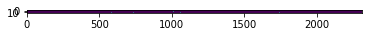

In [3]:
print('getting events ...')
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=5,
    NbTestingData=5,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1],#, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)
## Defining the network
print('initializing network ...')
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="exponential"
)

L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential"
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="exponential"
)
Net = Network([L1, L2, L3])

fname = "../Records/EXP_01_LagorceKmeans/Exp03_2020-04-17_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    print('training network ...')
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    print('running network ...')
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    print('classification ...')
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    

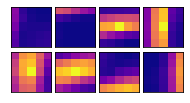

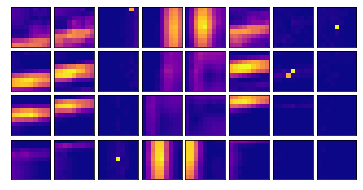

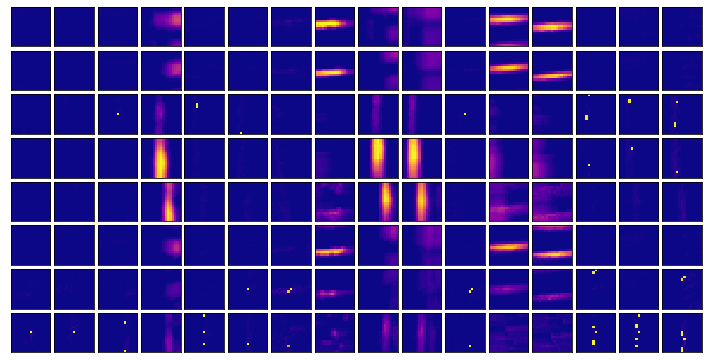

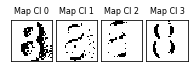

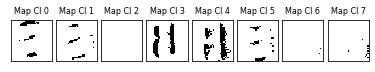

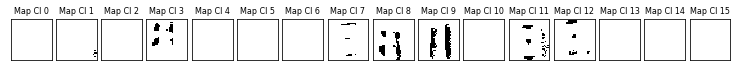

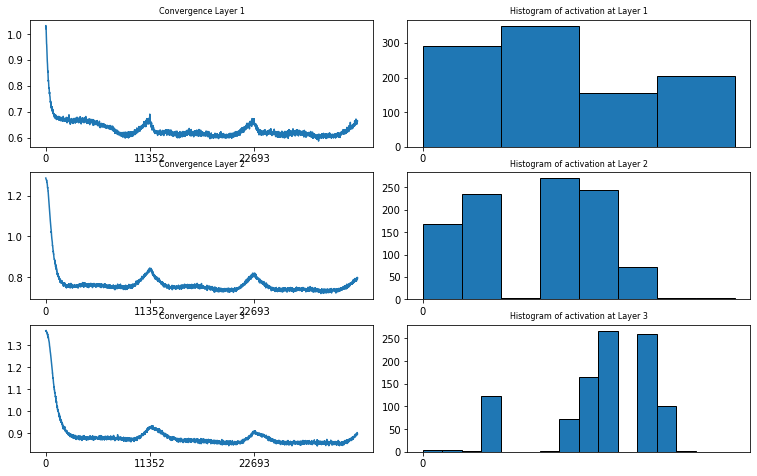

In [5]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("../Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## WITH HOMEO - Exp3 : Lagorce Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [5]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="lagorce", kernel="linear", homeo = True
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="linear", homeo = True
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="lagorce",
    kernel="linear", homeo = True
)
Net = Network([L1, L2, L3])


fname = "Records/EXP_01_LagorceKmeans/Exp03_2020-10-09_homeo_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
    prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)
    

battacha:90.0% ### normalized:90.0% ### euclidian:97.5% ### 


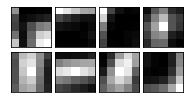

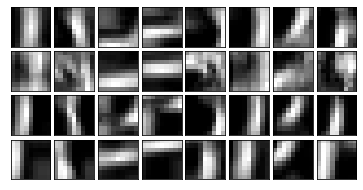

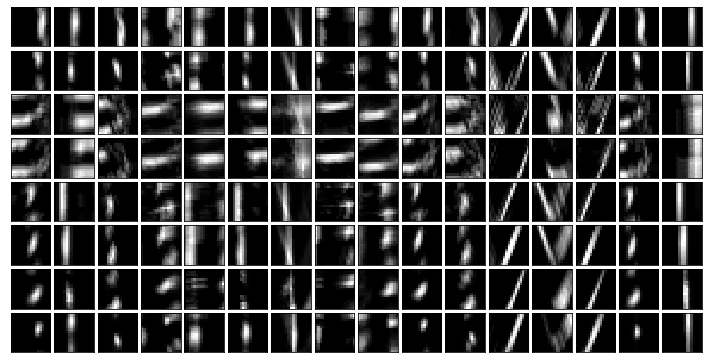

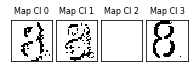

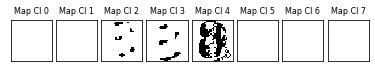

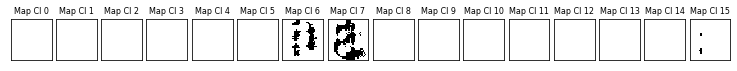

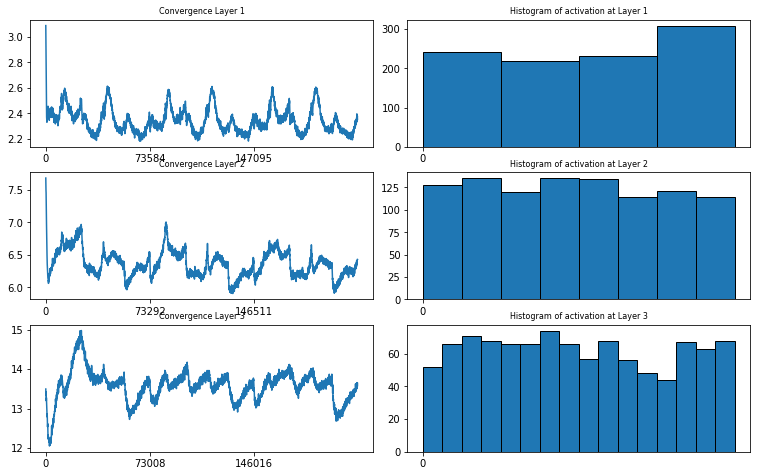

In [6]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

# Test of homeostasis rule for best results of Maro 

## WITHOUT HOMEO - Exp3 : Maro Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [7]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear", #homeo=True
)
L2 = ClusteringLayer(
    tau=10 * tau, R=2 * R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear", #homeo=True
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="linear",
    #homeo=True
)
Net = Network([L1, L2, L3])

fname = "Records/EXP_02_MaroKmeans/Exp03_2020-04-17_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:100.0% ### normalized:95.0% ### euclidian:97.5% ### 


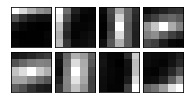

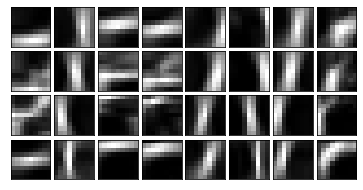

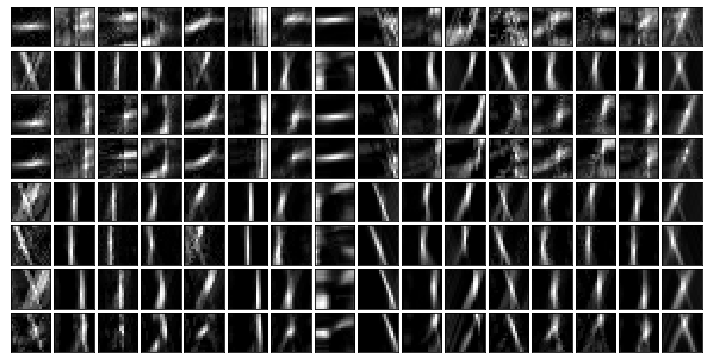

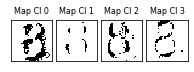

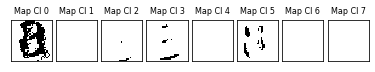

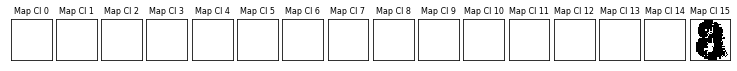

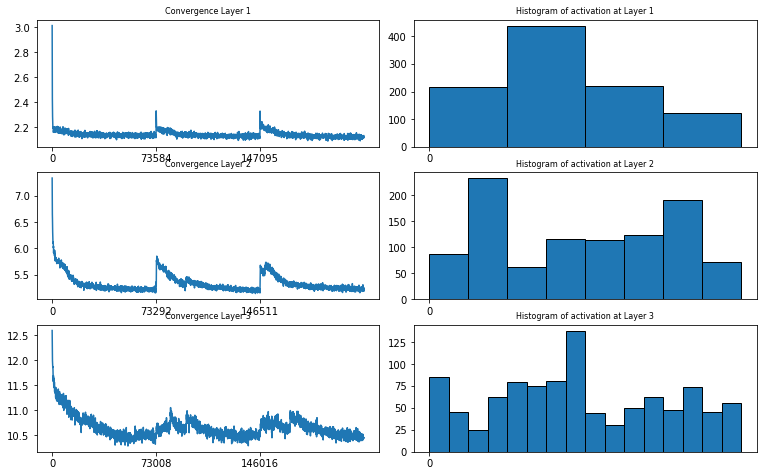

In [8]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## WITH HOMEO - Exp3 : Maro Kmeans + Linear Kernel + NoiseFilter(=2) + 2 Polarity in Input + 3 Cycles

In [9]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=False,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear", homeo=True
)
L2 = ClusteringLayer(
    tau=10 * tau, R=2 * R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="linear", homeo=True
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="linear",
    homeo=True
)
Net = Network([L1, L2, L3])


fname = "Records/EXP_02_MaroKmeans/Exp03_2020-10-09_homeo_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )
    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)
    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)
    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:95.0% ### normalized:92.5% ### euclidian:97.5% ### 


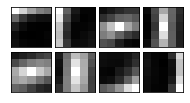

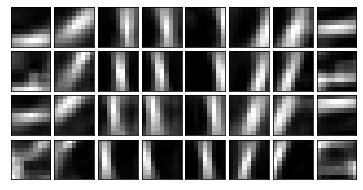

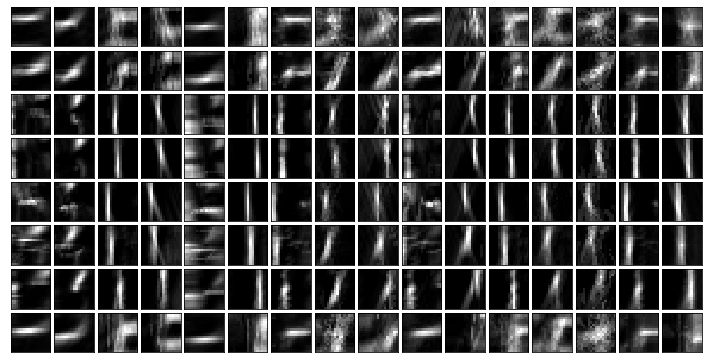

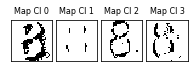

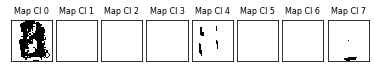

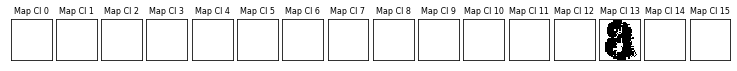

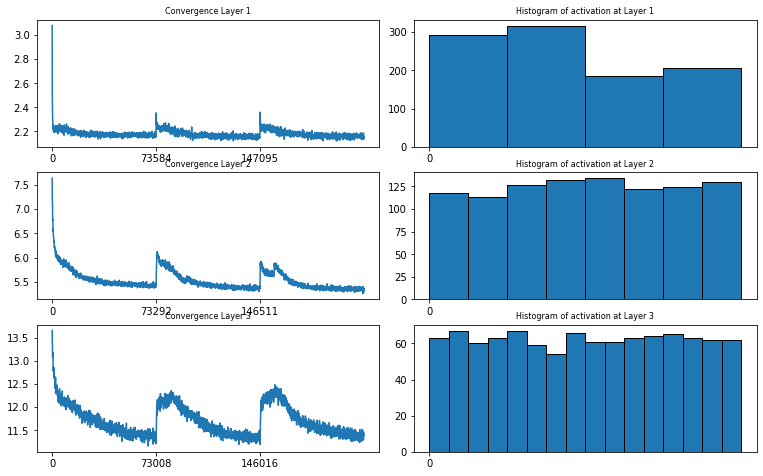

In [10]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=False)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## WITHOUT HOMEO - Exp2 : Maro Kmeans + Exp Kernel + NoiseFilter(=2) + 1 Polarity in Input + 3 Cycles

In [11]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=True,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="exponential",
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
)
Net = Network([L1, L2, L3])

fname = "Records/EXP_02_MaroKmeans/Exp02_2020-04-17_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:100.0% ### normalized:95.0% ### euclidian:97.5% ### 


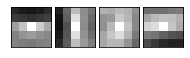

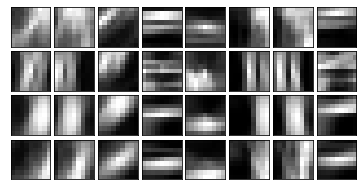

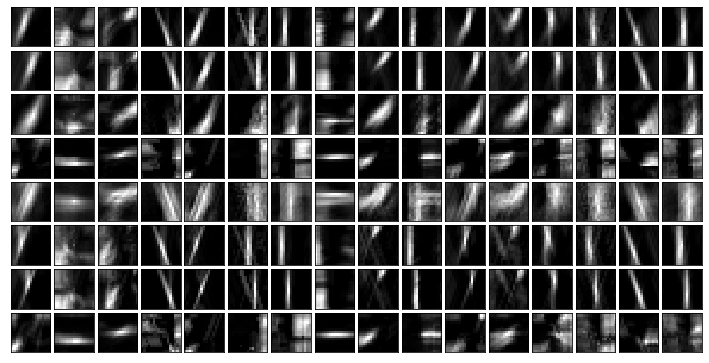

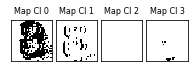

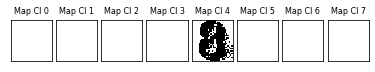

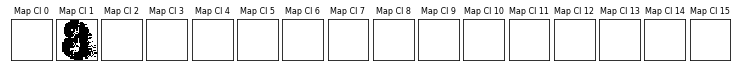

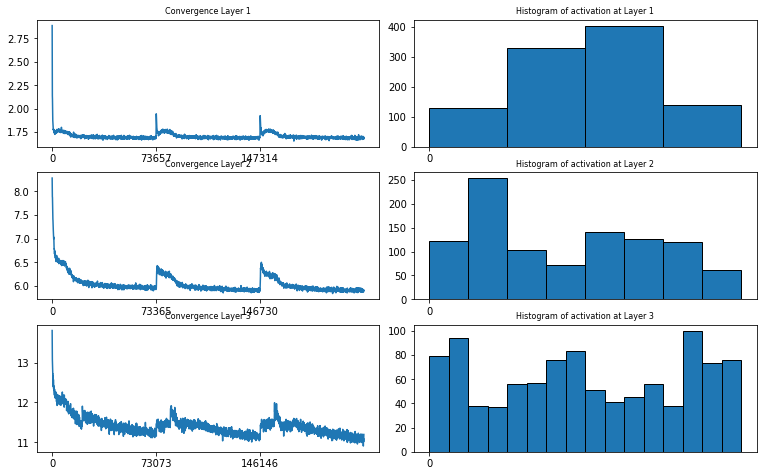

In [12]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=True)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])

## WITH HOMEO - Exp2 : Maro Kmeans + Exp Kernel + NoiseFilter(=2) + 1 Polarity in Input + 3 Cycles

In [13]:
event_tr, event_te, event_cl, label_tr, label_te = SimpleAlphabet(
    NbTrainingData=36,
    NbTestingData=40,
    Path=DataPath,
    LabelPath=LabelPath,
    ClusteringData=[1, 32, 19, 22, 29],
    OutOnePolarity=True,
    verbose=0,
)
## Defining the network
L1 = ClusteringLayer(
    tau=tau, R=R, verbose=0, ThrFilter=2, LearningAlgo="maro", kernel="exponential", homeo = True
)
L2 = ClusteringLayer(
    tau=10 * tau,
    R=2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
    homeo = True
)
L3 = ClusteringLayer(
    tau=10 * 10 * tau,
    R=2 * 2 * R,
    verbose=0,
    ThrFilter=2,
    LearningAlgo="maro",
    kernel="exponential",
    homeo = True
)
Net = Network([L1, L2, L3])

fname = "Records/EXP_02_MaroKmeans/Exp02_2020-10-09_homeo_notrdninit.pkl"
if not os.path.isfile(fname):
    #### Training The Cluster on 5 images
    ClusterLayer, event_output = Net.TrainCluster(
        event=event_cl, NbClusterList=nb_cluster, to_record=True, NbCycle=3
    )

    ## Generating histogram for training samples
    event0_o_tr = Net.RunNetwork(event_tr, NbClusterList=ClusterLayer)

    ## Generating histogram for the test samples
    event0_o_te = Net.RunNetwork(event_te, NbClusterList=ClusterLayer)

    Classif0 = Classifier(
        event0_o_tr, event0_o_te, TrainingLabel=label_tr, GroundTruth=label_te
    )
    SaveObject([ClusterLayer, Classif0], fname)
else:
    ClusterLayer, Classif0 = LoadObject(fname)
prediction, accuracy, method = Classif0.HistogramDistance(to_print=True)

battacha:85.0% ### normalized:87.5% ### euclidian:95.0% ### 


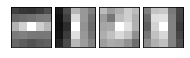

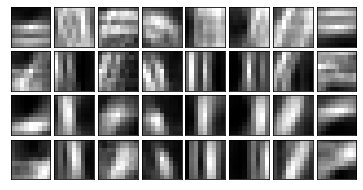

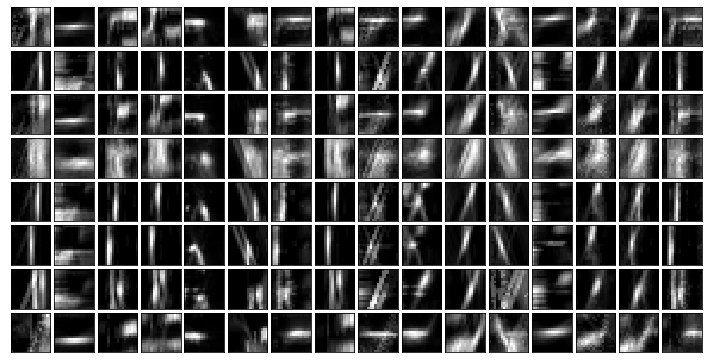

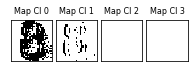

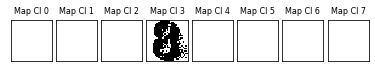

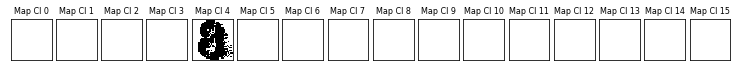

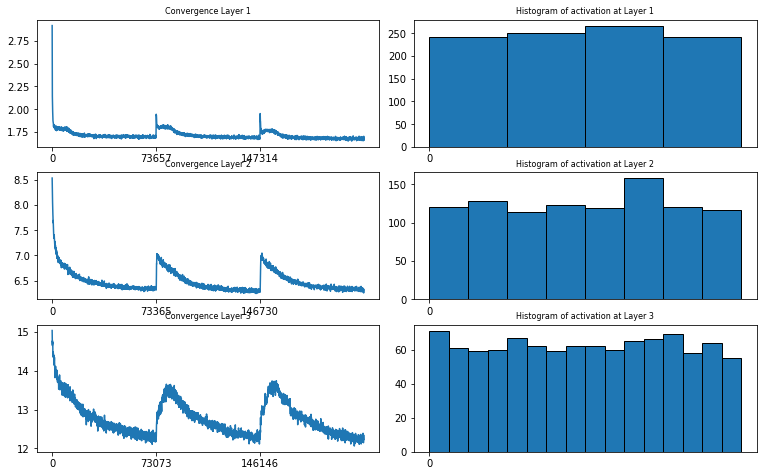

In [14]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=1)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)
event_to_show = Event(ImageSize=(32, 32), ListPolarities=[-1, 1], OutOnePolarity=True)
event_to_show.LoadFromMat("Data/alphabet_ExtractedStabilized.mat", image_number=22)
Net.RunNetwork(event_to_show, NbClusterList=ClusterLayer)
mapL1 = GenerateActivationMap(Net.Layers[0].output, ClusterLayer[0])
DisplayActivationMap(mapL1, scale=2)
mapL2 = GenerateActivationMap(Net.Layers[1].output, ClusterLayer[1])
DisplayActivationMap(mapL2, scale=2)
mapL3 = GenerateActivationMap(Net.Layers[2].output, ClusterLayer[2])
DisplayActivationMap(mapL3, scale=2)

DisplayConvergence(ClusterLayer, to_display=["error", "histo"])